# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task Description**

1.	Activate the virtual environment you created in the previous task, and install the libraries used for this Exercise. Once this is complete, launch JupyterLab.
2.	In a new notebook, import all necessary libraries and read in your final dataset from part 2, step 8 of the previous task.
3.	Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe. For this example, use a pandas plotting function.


**Task Solution**

As the dataset is very large in size so we have only read the required columnn for our analysis so it will save our time and processing speed

In [2]:
import pandas as pd

# List of columns you want to read and load into the DataFrame
columns_to_read = ['DATE','TAVG','TMAX','TMIN']  # Replace with the actual column names

# Read only the specified columns from the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Merged/Combined_DataWeatherFinal.csv', usecols=columns_to_read)


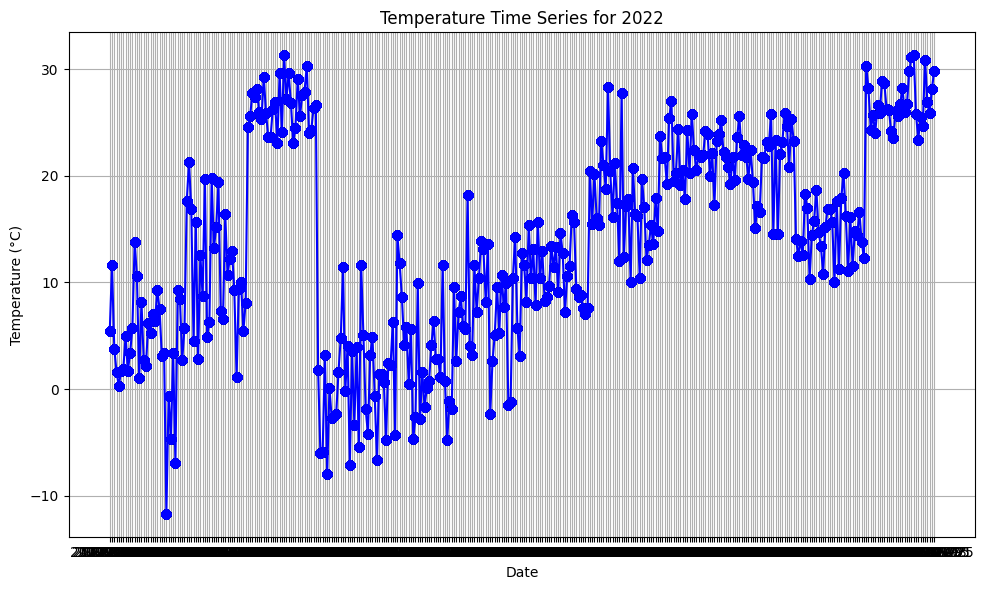

In [3]:

import matplotlib.pyplot as plt
# Create the line plot
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.plot(df['DATE'], df['TAVG'], marker='o', linestyle='-', color='b')


# Customize the plot (optional)
plt.title('Temperature Time Series for 2022')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

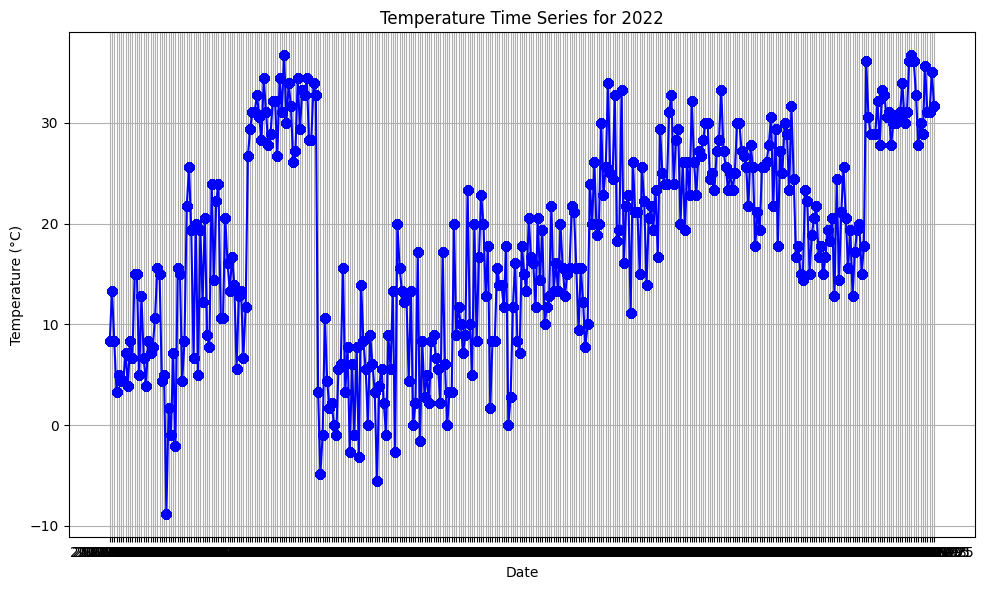

In [5]:

import matplotlib.pyplot as plt
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['TMAX'], marker='o', linestyle='-', color='b')



plt.title('Temperature Time Series for 2022')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

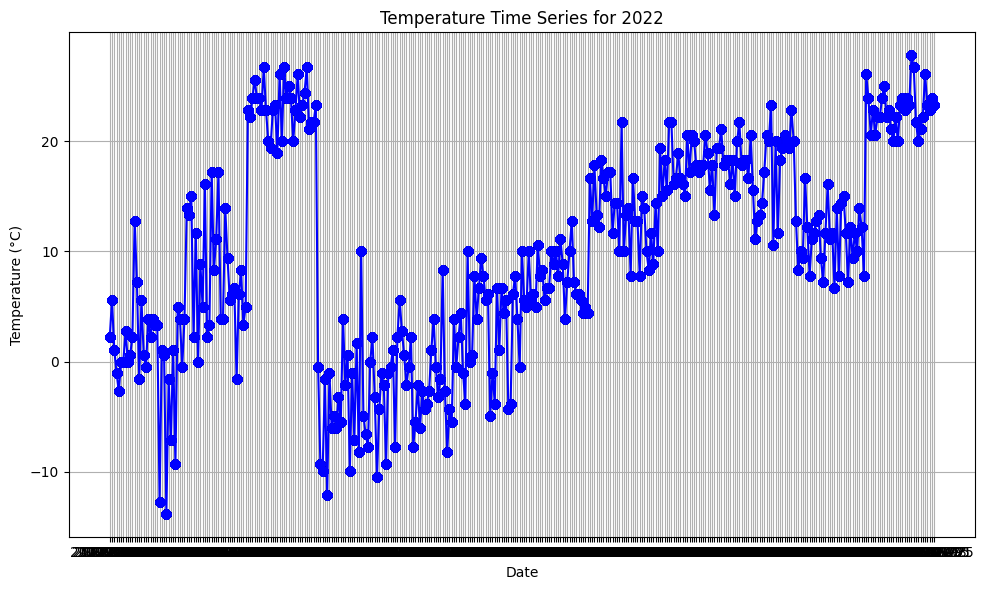

In [7]:

import matplotlib.pyplot as plt
# Create the line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df['DATE'], df['TMIN'], marker='o', linestyle='-', color='b')
plt.title('Temperature Time Series for 2022')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

**Inferences**

we have taken all the three scenarios for the temperature which are TMAX,TAVG and TMIN where TMAX is maximum temp, TAVG is avergae temp and TMIN is the minimum temp from this three plot we can say that the values for temp in these variables are different but the output plot is the same for all of them.

The plot shows how the temperature changes over the course of the year. We can observe peaks and valleys in the line, indicating the seasonal variation in temperatures. Higher points may represent summer months with warmer temperatures, while lower points may represent winter months with cooler temperatures.

The overall trend of the line can provide insights into long-term temperature changes. If the line slopes upwards, it suggests a general warming trend, whereas a downward slope indicates a cooling trend.



**Create a column with the count of trips per day and merge it with the weather dataframe.**

In [8]:
# List of columns you want to read and load into the DataFrame
columns_to_read = ['started_at',]  # Replace with the actual column names

# Read only the specified columns from the CSV file into a DataFrame
df1= pd.read_csv('/content/drive/MyDrive/Merged/Combined_DataWeatherFinal.csv', usecols=columns_to_read)

weather=pd.read_csv("/content/drive/MyDrive/weather data.csv")
columns_to_drop = [7,8,9,11,13,15,17,19,21,23,25,27,29,31,32,33,34,35,36,37,38,39,40,41,43,44,45]
weather = weather.drop(weather.columns[columns_to_drop], axis=1)


In [9]:
# Count the number of trips per day
df1['started_at']=pd.to_datetime(df1['started_at']).dt.date
trips_per_day = df1.groupby('started_at').size().reset_index(name='trip_count')
print(trips_per_day)

     started_at  trip_count
0    2022-01-01       20895
1    2022-01-02       44234
2    2022-01-03       34126
3    2022-01-04       37879
4    2022-01-05       35080
..          ...         ...
360  2022-12-27       34395
361  2022-12-28       45677
362  2022-12-29       53677
363  2022-12-30       64550
364  2022-12-31       32895

[365 rows x 2 columns]


In [10]:
trips_per_day.head(5)

,started_at,trip_count
0,2022-01-01,20895
1,2022-01-02,44234
2,2022-01-03,34126
3,2022-01-04,37879
4,2022-01-05,35080


In [11]:
trips_per_day['started_at'] = pd.to_datetime(trips_per_day['started_at'])
print(trips_per_day.dtypes)

started_at    datetime64[ns]
trip_count             int64
dtype: object


In [12]:
weather['DATE'] = pd.to_datetime(weather['DATE'])
print(weather.dtypes)

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
AWND                float64
PRCP                float64
SNOW                float64
SNWD                float64
TAVG                float64
TMAX                float64
TMIN                float64
WDF2                  int64
WDF5                  int64
WSF2                float64
WSF5                float64
WT01                float64
WT08                float64
dtype: object


In [13]:

merged_df = pd.merge(weather,trips_per_day, left_on='DATE', right_on='started_at', how='left')


merged_df.drop(columns=['started_at'], inplace=True)

#print(merged_df)

merged_df.to_csv('merged_weather_tripscount.csv', index=False)

In [14]:
merged_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08,trip_count
0,USW00014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-01-01,2.8,19.3,0.0,0.0,11.6,13.9,10.0,200,200,6.3,7.6,1.0,NaN,20895
1,USW00014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-01-02,4.3,1.0,0.0,0.0,11.4,15.6,3.9,310,310,12.5,14.8,1.0,NaN,44234
2,USW00014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-01-03,6.4,0.0,0.0,0.0,1.4,3.9,-4.3,340,350,12.5,15.2,NaN,NaN,34126
3,USW00014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-01-04,3.9,0.0,0.0,0.0,-2.7,2.2,-6.0,320,350,8.9,12.1,NaN,NaN,37879
4,USW00014732,"LAGUARDIA AIRPORT, NY US",40.77945,-73.88027,3.0,2022-01-05,3.4,6.1,0.0,0.0,3.2,8.9,0.0,250,200,6.7,10.7,1.0,1.0,35080


**Create a line chart of bike trip counts and temperatures plotted on a dual axis.**

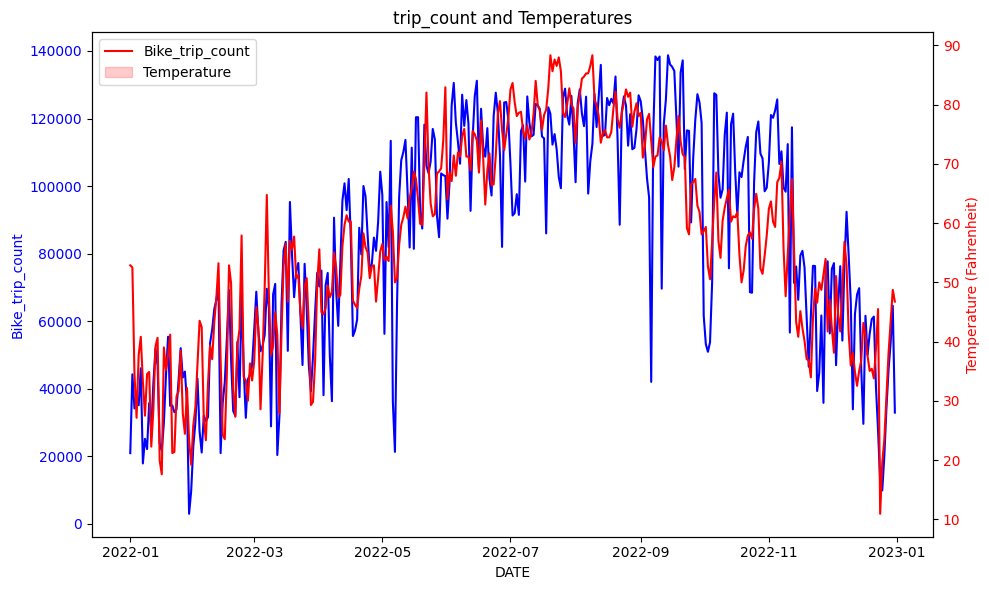

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Step 3: Prepare the data for the line chart
# Convert temperature to Fahrenheit (if it's in Celsius)
merged_df['temperatures_F'] = (merged_df['TAVG'] * 9/5) + 32

# Step 4: Create the dual-axis line chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bike trip counts on the first axis (left)
sns.lineplot(x='DATE', y='trip_count', data=merged_df, ax=ax1, color='b')
ax1.set_ylabel('Bike_trip_count', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second axis (right) for temperature
ax2 = ax1.twinx()
sns.lineplot(x='DATE', y='temperatures_F', data=merged_df, ax=ax2, color='r')
ax2.set_ylabel('Temperature (Fahrenheit)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Customize the chart
plt.title('trip_count and Temperatures')
plt.xlabel('Date')
plt.legend(labels=['Bike_trip_count', 'Temperature'], loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


**In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?**

**Code Explaination**

1.We start by creating a figure and an axis object (ax1) with plt.subplots(). We specify the size of the figure using the figsize parameter.

2.We plot the bike trip counts on ax1 using ax1.plot() and set the x-axis and left y-axis labels accordingly.

3.We create a second axis object (ax2) using ax1.twinx() to share the same x-axis but have a different y-axis (right y-axis) for plotting temperatures.

4.We plot temperatures on ax2 using ax2.plot() and set the right y-axis label.

5.We use ax1.tick_params() and ax2.tick_params() to customize the tick color and label colors for both axes.

6.We set a title for the plot using plt.title() and add legends to distinguish the two datasets.

7.Finally, we display the dual-axis line chart using plt.show().

The object-oriented paradigm in Matplotlib allows us to create and customize multiple axes within a single figure. By creating two separate axes, we can plot the bike trip counts and temperatures on different y-axes while sharing the same x-axis. This way, we can visually compare the two datasets on the same plot, even though they might have different scales and ranges. The dual-axis line chart provides a clear visualization of any potential correlations or patterns between bike trip counts and temperatures over time.